### Slide 1: Title Slide

### Title: "Reliance Global Group, Inc. Stock Analysis"

### Subtitle: "A 5-Year Forecast using Time Series Analysis"

### Your Name: Anuj Kumar

### Date: August 2024

### Slide 2: Introduction

### Overview: Brief introduction to Reliance Global Group, Inc.

### Objective: Explain the goal of the analysis—forecasting stock prices using time series data.

### Slide 3: Data Collection

### Data Source: Mention where you got the stock market data.

### Time Frame: 5 years (August 2019 - August 2024).

### Variables: Describe key variables, such as date, closing price, volume, etc.

### Slide 4: Data Preprocessing

### Steps Taken: Describe the steps you took to clean and prepare the data for analysis.

### Handling missing values

### Data normalization

### Time series decomposition (if applicable)

### Slide 5: Time Series Analysis

### Model Selection: Explain the type of time series model used (e.g., ARIMA, Exponential Smoothing, etc.).

### Model Training: Describe how you trained the model on historical data.

### Slide 6: Forecasting Results

### Visualization: Include a graph showing the actual vs. predicted stock prices.

### Key Insights: Highlight key findings from the forecast (e.g., trends, seasonality).

### Slide 7: Model Evaluation

### Metrics: Show evaluation metrics like RMSE, MAE, etc., to validate your model.

### Interpretation: Explain how well the model performed based on these metrics.

### Slide 8: Conclusion

### Summary: Recap the key points of your analysis.

### Business Implications: Discuss what the forecast means for potential investors or business strategy.

In [58]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from numpy import log
from pandas import Series

In [59]:
# importing dataset
df = pd.read_csv('Reliance Global Group, Inc. (RELI).csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-09,1377.000000,2312.850098,1326.000000,1484.099976,1484.099976,8040
1,2021-02-10,1785.000000,1785.000000,1530.000000,1654.949951,1654.949951,4398
2,2021-02-11,1734.000000,1734.000000,1530.000000,1547.849976,1547.849976,1076
3,2021-02-12,1522.349976,1524.900024,1226.550049,1328.550049,1328.550049,1899
4,2021-02-16,1338.750000,1377.000000,1277.550049,1290.300049,1290.300049,1012


## Preprocessing


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       877 non-null    object 
 1   Open       877 non-null    float64
 2   High       877 non-null    float64
 3   Low        877 non-null    float64
 4   Close      877 non-null    float64
 5   Adj Close  877 non-null    float64
 6   Volume     877 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 48.1+ KB


## There the data type of date is in object form so we change into date format

In [61]:
df['Date'] = pd.to_datetime(df['Date'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       877 non-null    datetime64[ns]
 1   Open       877 non-null    float64       
 2   High       877 non-null    float64       
 3   Low        877 non-null    float64       
 4   Close      877 non-null    float64       
 5   Adj Close  877 non-null    float64       
 6   Volume     877 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 48.1 KB


## Checking Duplicate Value

In [63]:
df.duplicated().sum()

0

## Checking Missing Value

In [64]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Durbin-Watson Test

In [65]:
import statsmodels.api as sm
sm.stats.durbin_watson(df['Open'])

0.013657290721133789

In [66]:
sm.stats.durbin_watson(df['Close'])

0.007755153600916828

In [67]:
sm.stats.durbin_watson(df['Volume'])

1.3564068452425158

In [68]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,877.000000,877.000000,877.000000,877.000000,877.000000,8.770000e+02
mean,436.123979,463.655880,411.119525,432.415516,432.415516,5.841290e+04
std,495.432668,538.287809,461.952666,492.166945,492.166945,8.413658e+05
min,3.160000,3.630000,2.430000,3.210000,3.210000,2.200000e+01
25%,41.139999,42.194000,39.099998,40.290001,40.290001,3.290000e+02
50%,173.399994,178.500000,163.455002,170.085007,170.085007,1.024000e+03
75%,765.000000,800.700012,731.849976,759.900024,759.900024,4.576000e+03
max,2286.840088,2674.949951,2073.149902,2376.600098,2376.600098,2.322638e+07


In [69]:
df.nunique()

Date         877
Open         636
High         658
Low          615
Close        649
Adj Close    649
Volume       753
dtype: int64

<Axes: >

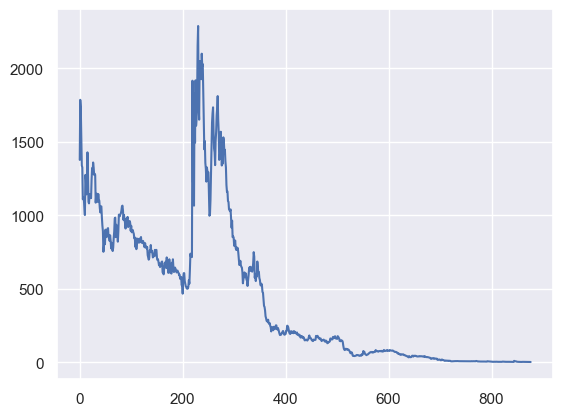

In [70]:
df['Open'].plot()

In [71]:
df['Time_Stamp'] = pd.DataFrame(df, columns=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Time_Stamp
0,2021-02-09,1377.000000,2312.850098,1326.000000,1484.099976,1484.099976,8040,2021-02-09
1,2021-02-10,1785.000000,1785.000000,1530.000000,1654.949951,1654.949951,4398,2021-02-10
2,2021-02-11,1734.000000,1734.000000,1530.000000,1547.849976,1547.849976,1076,2021-02-11
3,2021-02-12,1522.349976,1524.900024,1226.550049,1328.550049,1328.550049,1899,2021-02-12
4,2021-02-16,1338.750000,1377.000000,1277.550049,1290.300049,1290.300049,1012,2021-02-16


In [72]:
df_final_model = df.set_index('Time_Stamp')
df_final_model.head()


,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2021-02-09,2021-02-09,1377.000000,2312.850098,1326.000000,1484.099976,1484.099976,8040
2021-02-10,2021-02-10,1785.000000,1785.000000,1530.000000,1654.949951,1654.949951,4398
2021-02-11,2021-02-11,1734.000000,1734.000000,1530.000000,1547.849976,1547.849976,1076
2021-02-12,2021-02-12,1522.349976,1524.900024,1226.550049,1328.550049,1328.550049,1899
2021-02-16,2021-02-16,1338.750000,1377.000000,1277.550049,1290.300049,1290.300049,1012


In [73]:
df_final_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 877 entries, 2021-02-09 to 2024-08-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       877 non-null    datetime64[ns]
 1   Open       877 non-null    float64       
 2   High       877 non-null    float64       
 3   Low        877 non-null    float64       
 4   Close      877 non-null    float64       
 5   Adj Close  877 non-null    float64       
 6   Volume     877 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 54.8 KB


## Decomposition to check dataset

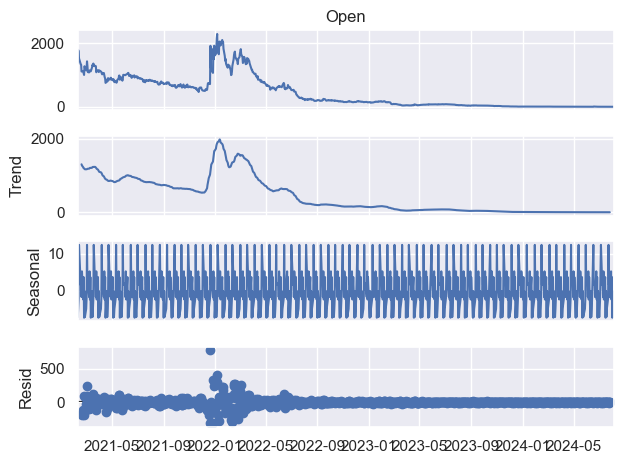

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df_final_model['Open'], period=12)
decompose.plot()
plt.show()

## Plot the boxplot of the 'Open' variable with respect to the different years

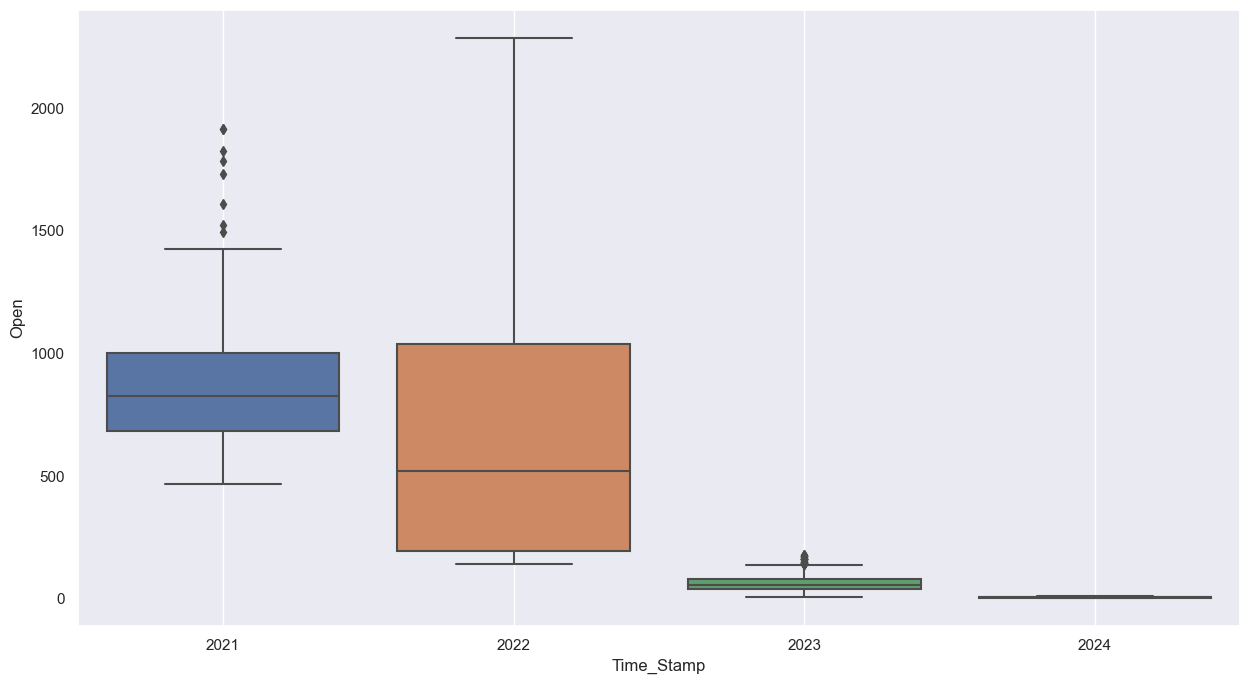

In [75]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_final_model.index.year, y = df_final_model['Open'])
plt.grid();

In [76]:
df_final_model.index.year

Int64Index([2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
            ...
            2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
           dtype='int64', name='Time_Stamp', length=877)

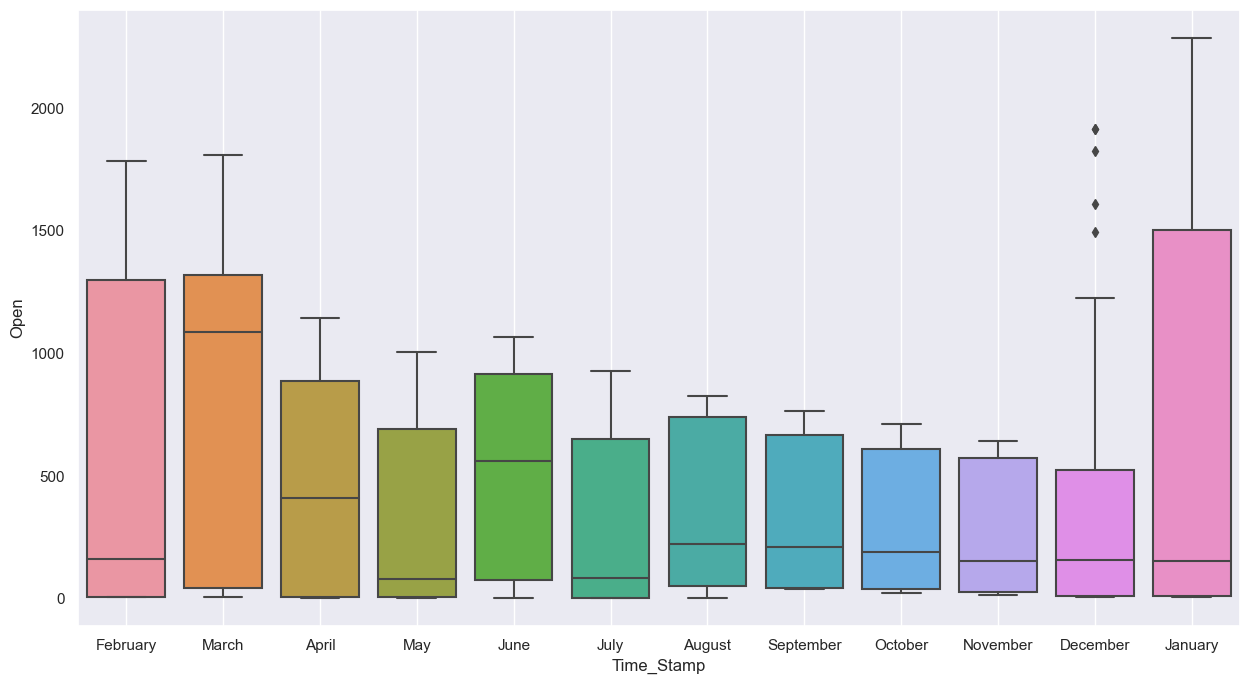

In [77]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df_final_model.index.month_name(), y = df_final_model['Open'])
plt.grid();

## Augmented Dickey Fuller Test - To check time series data is stationary or not

In [78]:
from statsmodels.tsa.stattools import adfuller

In [79]:
adfuller(df_final_model['Open'])

(-1.6630496873350098,
 0.45024383391956346,
 21,
 855,
 {'1%': -3.4380213934599957,
  '5%': -2.8649263237651375,
  '10%': -2.5685731407954586},
 9516.211190617938)

## Define a function to check the Augmented Dickey Fuller Test

In [80]:
def check_adftest(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test - To check data is Stationary or not")
    labels = ['ADF Stats', 'P-Values','#Lags', 'No of observation']
    for i, j in zip(result, labels):
        print(j + " :-> " + str(i))

    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my time series is Stationary")
    else:
        print("Weak Evidence against null hypothes and my time series is Non-Stationary")

In [81]:
check_adftest(df_final_model['Open'])

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> -1.6630496873350098
P-Values :-> 0.45024383391956346
#Lags :-> 21
No of observation :-> 855
Weak Evidence against null hypothes and my time series is Non-Stationary


In [82]:
df_final_model['1st Diff'] = df_final_model['Open'] - df_final_model['Open'].shift(1)

In [83]:
df_final_model

,Date,Open,High,Low,Close,Adj Close,Volume,1st Diff
Time_Stamp,,,,,,,,
2021-02-09,2021-02-09,1377.000000,2312.850098,1326.000000,1484.099976,1484.099976,8040,NaN
2021-02-10,2021-02-10,1785.000000,1785.000000,1530.000000,1654.949951,1654.949951,4398,408.000000
2021-02-11,2021-02-11,1734.000000,1734.000000,1530.000000,1547.849976,1547.849976,1076,-51.000000
2021-02-12,2021-02-12,1522.349976,1524.900024,1226.550049,1328.550049,1328.550049,1899,-211.650024
2021-02-16,2021-02-16,1338.750000,1377.000000,1277.550049,1290.300049,1290.300049,1012,-183.599976
...,...,...,...,...,...,...,...,...
2024-07-30,2024-07-30,3.800000,3.890000,3.500000,3.600000,3.600000,107300,-0.090000
2024-07-31,2024-07-31,3.600000,3.760000,3.510000,3.590000,3.590000,39200,-0.200000
2024-08-01,2024-08-01,3.600000,3.643000,3.400000,3.440000,3.440000,40300,0.000000


In [84]:
check_adftest(df_final_model['1st Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> -8.434530929017622
P-Values :-> 1.8318319799413221e-13
#Lags :-> 20
No of observation :-> 855
Strong evidence against null hypothesis and my time series is Stationary


## Split the data into train and test

In [85]:
start_date = df_final_model.index.min()
end_date = df_final_model.index.max()
print("Start Date of Stock  :", start_date)
print("End Data of the Stock :", end_date)

Start Date of Stock  : 2021-02-09 00:00:00
End Data of the Stock : 2024-08-05 00:00:00


In [86]:
train = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2022-02-02')]
test = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2022-02-02')]

In [87]:
train.shape, test.shape

((248, 8), (629, 8))

In [88]:
train_final = train[['1st Diff']]
test_final = test[['1st Diff']]

In [89]:
train_final

,1st Diff
Time_Stamp,
2021-02-09,NaN
2021-02-10,408.000000
2021-02-11,-51.000000
2021-02-12,-211.650024
2021-02-16,-183.599976
...,...
2022-01-26,56.099976
2022-01-27,-147.900024
2022-01-28,-40.799927


In [90]:
test_final

,1st Diff
Time_Stamp,
2022-02-02,-25.500000
2022-02-03,-5.099976
2022-02-04,-2.550048
2022-02-07,-147.900025
2022-02-08,-147.899963
...,...
2024-07-30,-0.090000
2024-07-31,-0.200000
2024-08-01,0.000000


## Checking the hypothesis testing

In [91]:
check_adftest(train_final['1st Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> -3.167128356329096
P-Values :-> 0.021968022449096757
#Lags :-> 16
No of observation :-> 230
Strong evidence against null hypothesis and my time series is Stationary


In [92]:
check_adftest(test_final['1st Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or not
ADF Stats :-> -6.671168986920455
P-Values :-> 4.5839452098624205e-09
#Lags :-> 20
No of observation :-> 608
Strong evidence against null hypothesis and my time series is Stationary


## Building Time Series Forecasting



## Using Facebook Prophet Model

In [93]:
!pip install prophet

In [94]:
import prophet
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [95]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Time_Stamp
0,2021-02-09,1377.000000,2312.850098,1326.000000,1484.099976,1484.099976,8040,2021-02-09
1,2021-02-10,1785.000000,1785.000000,1530.000000,1654.949951,1654.949951,4398,2021-02-10
2,2021-02-11,1734.000000,1734.000000,1530.000000,1547.849976,1547.849976,1076,2021-02-11
3,2021-02-12,1522.349976,1524.900024,1226.550049,1328.550049,1328.550049,1899,2021-02-12
4,2021-02-16,1338.750000,1377.000000,1277.550049,1290.300049,1290.300049,1012,2021-02-16
...,...,...,...,...,...,...,...,...
872,2024-07-30,3.800000,3.890000,3.500000,3.600000,3.600000,107300,2024-07-30
873,2024-07-31,3.600000,3.760000,3.510000,3.590000,3.590000,39200,2024-07-31
874,2024-08-01,3.600000,3.643000,3.400000,3.440000,3.440000,40300,2024-08-01
875,2024-08-02,3.400000,3.630000,3.300000,3.600000,3.600000,43800,2024-08-02


In [96]:
df = df.iloc[:,:-1]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-09,1377.000000,2312.850098,1326.000000,1484.099976,1484.099976,8040
1,2021-02-10,1785.000000,1785.000000,1530.000000,1654.949951,1654.949951,4398
2,2021-02-11,1734.000000,1734.000000,1530.000000,1547.849976,1547.849976,1076
3,2021-02-12,1522.349976,1524.900024,1226.550049,1328.550049,1328.550049,1899
4,2021-02-16,1338.750000,1377.000000,1277.550049,1290.300049,1290.300049,1012


In [97]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,877.000000,877.000000,877.000000,877.000000,877.000000,8.770000e+02
mean,436.123979,463.655880,411.119525,432.415516,432.415516,5.841290e+04
std,495.432668,538.287809,461.952666,492.166945,492.166945,8.413658e+05
min,3.160000,3.630000,2.430000,3.210000,3.210000,2.200000e+01
25%,41.139999,42.194000,39.099998,40.290001,40.290001,3.290000e+02
50%,173.399994,178.500000,163.455002,170.085007,170.085007,1.024000e+03
75%,765.000000,800.700012,731.849976,759.900024,759.900024,4.576000e+03
max,2286.840088,2674.949951,2073.149902,2376.600098,2376.600098,2.322638e+07


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       877 non-null    datetime64[ns]
 1   Open       877 non-null    float64       
 2   High       877 non-null    float64       
 3   Low        877 non-null    float64       
 4   Close      877 non-null    float64       
 5   Adj Close  877 non-null    float64       
 6   Volume     877 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 48.1 KB


In [99]:
from prophet import Prophet

In [100]:
df_prophet = df.rename(columns={'Date':'ds', 'Open':'y'})
df_prophet

,ds,y,High,Low,Close,Adj Close,Volume
0,2021-02-09,1377.000000,2312.850098,1326.000000,1484.099976,1484.099976,8040
1,2021-02-10,1785.000000,1785.000000,1530.000000,1654.949951,1654.949951,4398
2,2021-02-11,1734.000000,1734.000000,1530.000000,1547.849976,1547.849976,1076
3,2021-02-12,1522.349976,1524.900024,1226.550049,1328.550049,1328.550049,1899
4,2021-02-16,1338.750000,1377.000000,1277.550049,1290.300049,1290.300049,1012
...,...,...,...,...,...,...,...
872,2024-07-30,3.800000,3.890000,3.500000,3.600000,3.600000,107300
873,2024-07-31,3.600000,3.760000,3.510000,3.590000,3.590000,39200
874,2024-08-01,3.600000,3.643000,3.400000,3.440000,3.440000,40300
875,2024-08-02,3.400000,3.630000,3.300000,3.600000,3.600000,43800


In [101]:
df_prophet['ds'].max()

Timestamp('2024-08-05 00:00:00')

In [102]:
m = Prophet()
model = m.fit(df_prophet)

12:47:05 - cmdstanpy - INFO - Chain [1] start processing
12:47:06 - cmdstanpy - INFO - Chain [1] done processing


In [103]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [104]:
# last date
future_global = model.make_future_dataframe(periods=100, freq='D')
future_global.tail()

,ds
972,2024-11-09
973,2024-11-10
974,2024-11-11
975,2024-11-12
976,2024-11-13


In [105]:
len(df_prophet)

877

In [106]:
df_prophet.tail()

,ds,y,High,Low,Close,Adj Close,Volume
872,2024-07-30,3.80,3.890,3.50,3.60,3.60,107300
873,2024-07-31,3.60,3.760,3.51,3.59,3.59,39200
874,2024-08-01,3.60,3.643,3.40,3.44,3.44,40300
875,2024-08-02,3.40,3.630,3.30,3.60,3.60,43800
876,2024-08-05,3.16,3.640,2.43,3.21,3.21,207400


In [107]:
future_global.tail(20)

,ds
957,2024-10-25
958,2024-10-26
959,2024-10-27
960,2024-10-28
961,2024-10-29
962,2024-10-30
963,2024-10-31
964,2024-11-01
965,2024-11-02
966,2024-11-03


In [108]:
len(future_global)

977

## Predict the model data

In [109]:
prediction = model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-09,1191.535159,1048.899293,1408.248505,1191.535159,1191.535159,41.803857,41.803857,41.803857,-26.762726,-26.762726,-26.762726,68.566583,68.566583,68.566583,0.0,0.0,0.0,1233.339017
1,2021-02-10,1189.554034,1059.286896,1405.255192,1189.554034,1189.554034,42.932092,42.932092,42.932092,-29.940026,-29.940026,-29.940026,72.872118,72.872118,72.872118,0.0,0.0,0.0,1232.486125
2,2021-02-11,1187.572908,1055.273495,1429.131212,1187.572908,1187.572908,48.056130,48.056130,48.056130,-29.403321,-29.403321,-29.403321,77.459451,77.459451,77.459451,0.0,0.0,0.0,1235.629039
3,2021-02-12,1185.591782,1045.688081,1404.007977,1185.591782,1185.591782,44.578915,44.578915,44.578915,-37.611933,-37.611933,-37.611933,82.190848,82.190848,82.190848,0.0,0.0,0.0,1230.170697
4,2021-02-16,1177.667280,1067.276728,1429.901922,1177.667280,1177.667280,73.402249,73.402249,73.402249,-26.762726,-26.762726,-26.762726,100.164974,100.164974,100.164974,0.0,0.0,0.0,1251.069528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,2024-11-09,-5.030274,-256.128253,165.123662,-89.665731,99.772922,-39.681101,-39.681101,-39.681101,80.561287,80.561287,80.561287,-120.242389,-120.242389,-120.242389,0.0,0.0,0.0,-44.711376
973,2024-11-10,-5.215602,-250.419720,169.948220,-92.127263,100.882699,-41.448321,-41.448321,-41.448321,80.561346,80.561346,80.561346,-122.009666,-122.009666,-122.009666,0.0,0.0,0.0,-46.663923
974,2024-11-11,-5.400929,-382.249914,48.120713,-93.941552,101.135370,-160.995156,-160.995156,-160.995156,-37.404627,-37.404627,-37.404627,-123.590529,-123.590529,-123.590529,0.0,0.0,0.0,-166.396085
975,2024-11-12,-5.586257,-357.828967,72.364721,-96.005055,103.450547,-151.773459,-151.773459,-151.773459,-26.762726,-26.762726,-26.762726,-125.010733,-125.010733,-125.010733,0.0,0.0,0.0,-157.359716


In [110]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [111]:
prediction[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail(100)

,ds,yhat_lower,yhat_upper,yhat
877,2024-08-06,-239.265435,138.602739,-47.218811
878,2024-08-07,-235.740533,141.432744,-50.479883
879,2024-08-08,-239.065872,142.847240,-50.065757
880,2024-08-09,-244.805597,104.603674,-58.455156
881,2024-08-10,-121.914303,245.298178,59.463077
...,...,...,...,...
972,2024-11-09,-256.128253,165.123662,-44.711376
973,2024-11-10,-250.419720,169.948220,-46.663923
974,2024-11-11,-382.249914,48.120713,-166.396085
975,2024-11-12,-357.828967,72.364721,-157.359716


## Plotting the data prediction

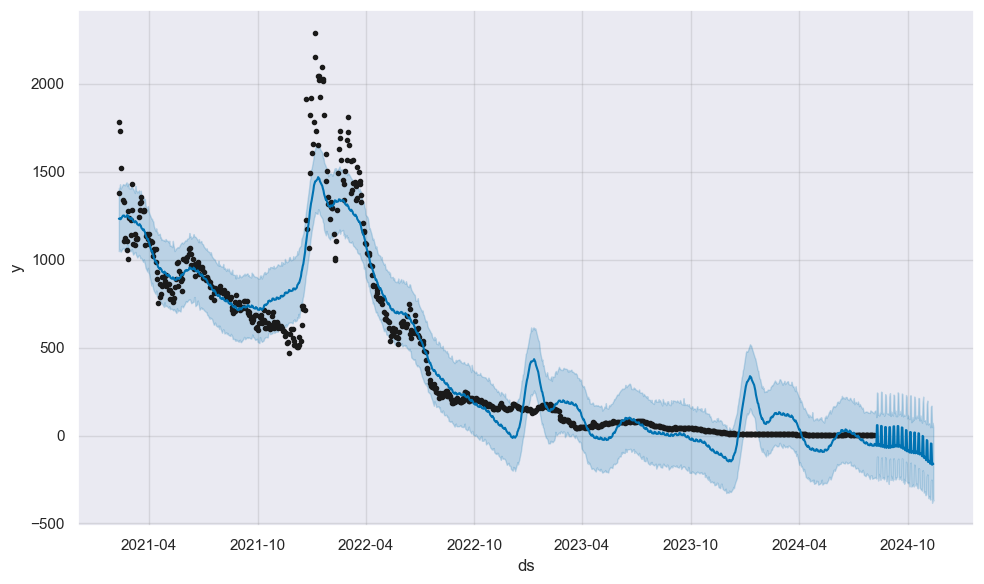

In [112]:
model.plot(prediction)
plt.show()

In [113]:
# ARIMA = AR = Partial autocorrelation (P)
# I - integrated (Difference) = D = 1
# MA - Auto correlation (Q)
# PARAMETER = P D Q


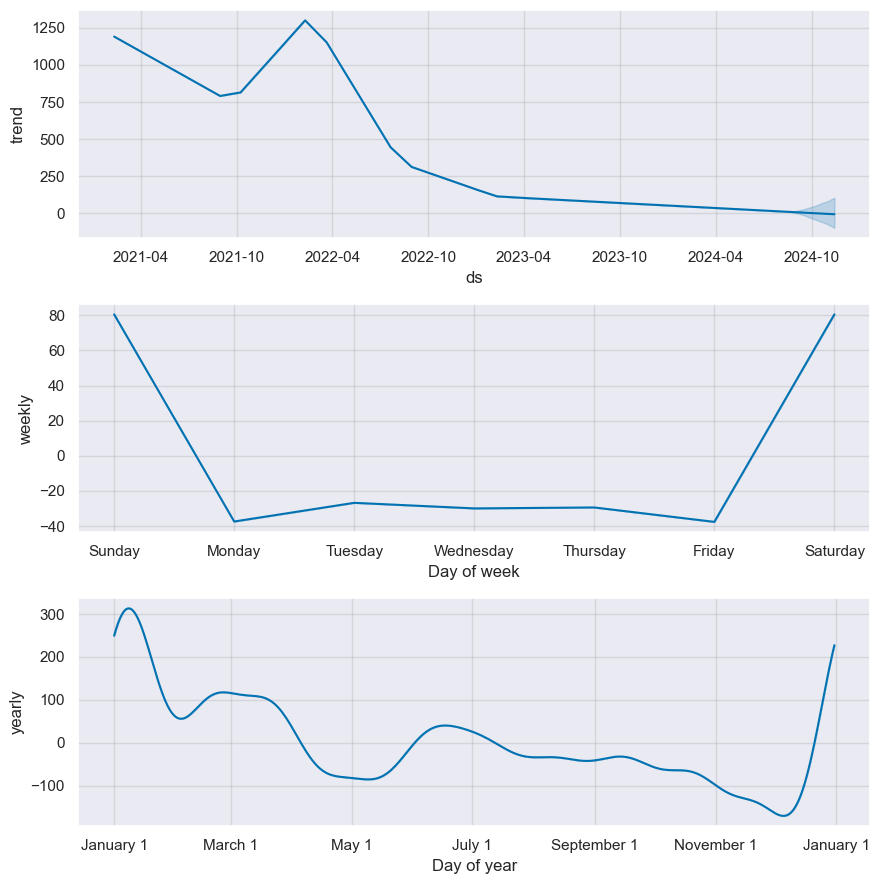

In [114]:
model.plot_components(prediction)
plt.show()